In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

In [5]:
df = load_iris(as_frame=True)
df = df['data']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


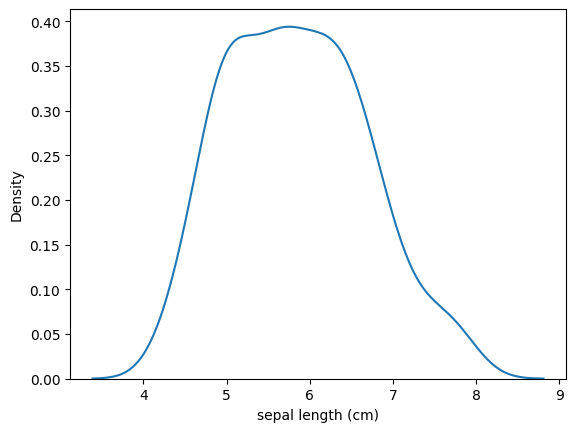

In [6]:
sns.kdeplot(df['sepal length (cm)'])
plt.show()

In [14]:
# Taking 100 samples
samples = []
samples_std = []
samples_mean = []
for i in range(100):
    samples.append(df['sepal length (cm)'].sample(30).values)
    samples_std.append(samples[i].std())
    samples_mean.append(samples[i].mean())

In [16]:
mean_std = np.array(samples_std).mean()

In [18]:
# Confidience Interval - 95%
# Degrees of freedom = 30 - 1 = 29
# t(alpha/2) = 2.045 for CI = 95% and df = 29 -> Using Table - https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf
upper_limit = np.array(samples_mean).mean() + 2.045*mean_std / np.sqrt(30)
lower_limit = np.array(samples_mean).mean() - 2.045*mean_std / np.sqrt(30)

print('The range is',lower_limit,'-',upper_limit)

The range is 5.535677657964429 - 6.137522342035572


In [19]:
# Population Mean
df['sepal length (cm)'].mean()

np.float64(5.843333333333334)

In [20]:
from scipy import stats

# Calculate t-statistic for 95% confidence interval with 29 degrees of freedom
t_stat = stats.t.ppf(0.975, df=29)  # 0.975 because we want 95% CI (2.5% on each tail)
print(f"T-statistic value: {t_stat}")

# We can verify this matches our previous manual calculation
print(f"Previous manual value used: 2.045")

T-statistic value: 2.045229642132703
Previous manual value used: 2.045
